## Linear Regression Training Project: Experience → Salary

This notebook walks through building and evaluating a simple linear regression model to predict annual salary (in thousands) from work experience (in years).

- Objective: quantify the linear relationship between experience and annual salary and assess predictive performance.
- Dataset: `Experience-Salary.csv` with experience in months and salary in thousands per month.
- Tools: pandas (data handling), seaborn/matplotlib (visualization), scikit-learn (modeling), SciPy (diagnostics).
- Workflow:
  1) Load and preview data
  2) Explore structure and summary statistics
  3) Feature engineering (months → years; monthly → annual)
  4) Visualize relationships
  5) Train/test split
  6) Fit LinearRegression
  7) Inspect parameters (slope/intercept) and R²
  8) Predict and evaluate (MAE/MSE/RMSE)
  9) Residual diagnostics (histogram, Q–Q plot)

Note: Comments and definitions are provided throughout to explain what each part does and why it matters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the Data

We load the dataset from CSV into a pandas DataFrame and preview a sample of rows to ensure columns were parsed as expected.

- `exp(in months)`: total work experience in months.
- `salary(in thousands)`: monthly salary measured in thousands of the currency unit.

Previewing helps spot obvious issues (missing headers, wrong types, unusual values) before we proceed.

In [ ]:
# Load dataset; inspect first 10 rows to confirm schema and values
data = pd.read_csv('Experience-Salary.csv')
data.head(10)

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
5,31.671171,32.966251
6,14.186399,15.294170
7,29.932845,33.159461
8,32.841327,32.032653
9,26.873869,32.347784


### Data Understanding and Preparation

This phase ensures we know what we have and that variables are in the right form for modeling.

- `DataFrame.info()`: column names, non-null counts, and data types — useful for checking missing data and types.
- `DataFrame.describe()`: summary statistics (count, mean, std, quartiles, min/max) — helps gauge scale and potential outliers.

Next, we create modeling-friendly features by converting months → years and monthly salary → annual salary.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
data.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


In [ ]:
# Feature engineering: months → years; monthly (thousands) → annual (thousands per year)
data['exp(in years)'] = data['exp(in months)'] / 12
data['annualSalary(in thousands)'] = data['salary(in thousands)'] * 12

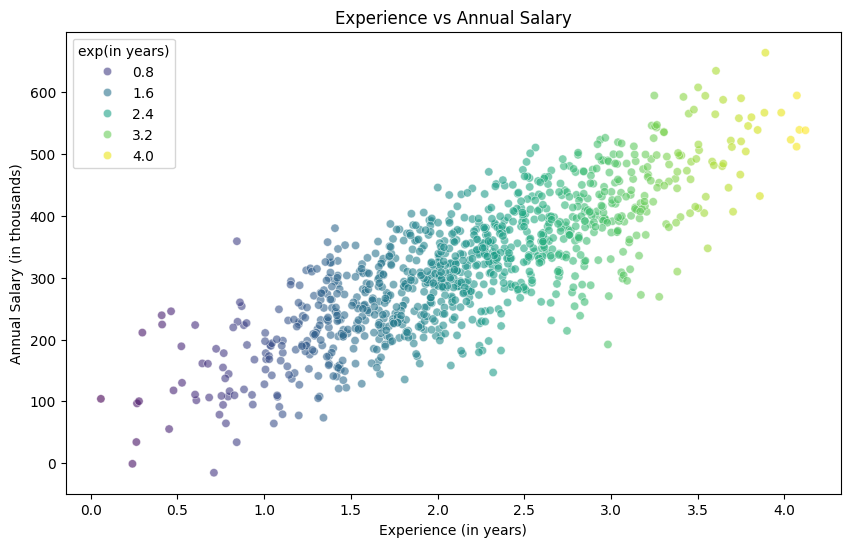

In [ ]:
# Relationship between experience (years) and annual salary (thousands)
plt.figure(figsize=(10, 6))
# Color by experience to show gradient along x-axis; semi-transparent points to reduce overplotting
sns.scatterplot(data=data, 
    x='exp(in years)', 
    y='annualSalary(in thousands)',
    hue=data['exp(in years)'],
    palette='viridis',
    alpha=0.6
)
plt.title('Experience vs Annual Salary')
plt.xlabel('Experience (in years)')
plt.ylabel('Annual Salary (in thousands)')
plt.show()

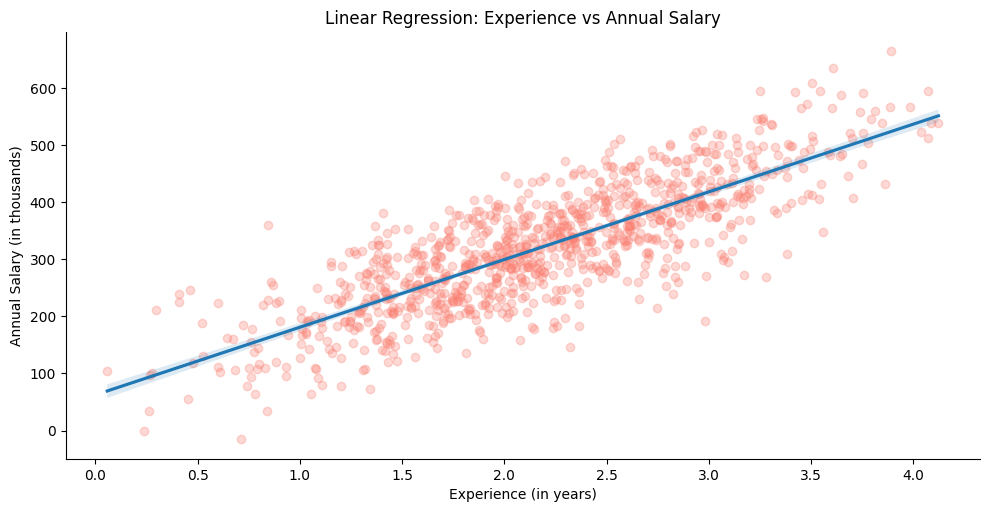

In [ ]:
# Fit and display simple linear regression with confidence interval
sns.lmplot(data=data,
           x='exp(in years)', 
           y='annualSalary(in thousands)',
           scatter_kws={'alpha':0.3, 'color':'salmon'},  # lighter points for readability
           aspect=2, 
           height=5)
plt.title('Linear Regression: Experience vs Annual Salary')
plt.xlabel('Experience (in years)')
plt.ylabel('Annual Salary (in thousands)')
plt.show()

### Splitting the data (with scikit-learn)

We split the dataset into a training set (to fit the model) and a test set (to evaluate generalization on unseen data).

- `test_size=0.3`: 30% of the data is held out for testing; 70% is used for training.
- `random_state=42`: makes the split reproducible.

This prevents overfitting assessments based on the same data used for training.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   exp(in months)              1000 non-null   float64
 1   salary(in thousands)        1000 non-null   float64
 2   exp(in years)               1000 non-null   float64
 3   annualSalary(in thousands)  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [51]:
x = data['exp(in years)']
y = data['annualSalary(in thousands)']

In [47]:
x.head()
y.head()

0    198.261899
1    139.994805
2    278.007055
3    250.525745
4    277.994828
Name: annualSalary(in thousands), dtype: float64

In [ ]:
# Split into train/test to evaluate generalization (30% test holdout, reproducible split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Training the Model

We use `LinearRegression` (ordinary least squares) to fit a line minimizing the sum of squared residuals between actual and predicted salaries.

Key assumptions to keep in mind (diagnosed later via residuals):
- Linearity: relationship between features and target is linear.
- Independence: observations/residuals are independent.
- Homoscedasticity: residuals have constant variance across the range of fitted values.
- Normality: residuals are approximately normally distributed (useful for inference).

Reshape the data to a 2D array

scikit-learn estimators expect `X` as a 2D array of shape `(n_samples, n_features)`. For a single feature, reshape the 1D Series into a 2D column vector using `.values.reshape(-1, 1)`.

In [ ]:
# scikit-learn expects X as 2D array: (n_samples, n_features)
x_train = x_train.values.reshape(-1, 1) 
x_test = x_test.values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit OLS line minimizing squared residuals on training data
model.fit(x_train, y_train)

LinearRegression()

#### Linear Regression: y = m · x + b

- `m` (slope, `model.coef_`): change in predicted annual salary (in thousands) for a one-year increase in experience.
- `b` (intercept, `model.intercept_`): predicted annual salary (in thousands) when experience is zero.

Units: x is in years; y is in thousands per year.

`model.coef_ = m`

Slope (per-feature coefficient). For a single feature, this is a 1-element array. A positive value indicates salary increases with experience.

In [70]:
model.coef_

array([121.7074204])

`model.intercept_ = b`

Intercept (baseline). Predicted annual salary (in thousands) when experience = 0 years.

In [71]:
model.intercept_

54.2672622520883

In [74]:
model.score(x_test, y_test)

0.6244430438622031

### Model R² (coefficient of determination)

`model.score(X_test, y_test)` returns R² on the test set:
- R² = 1: perfect fit; R² = 0: no better than predicting the mean of y; negative: worse than mean.
- We care about test R² because it reflects generalization, not just training fit.

### Predictions

We generate predictions on the held-out test set and compare them against actual values. A tight, roughly linear cloud around the diagonal indicates good calibration.

In [ ]:
# Predict salaries for the held-out test set
predictions = model.predict(x_test)

In [79]:
predictions

array([428.29754024, 241.10938212, 510.79119749, 396.89569493,
       215.62121044, 293.45210906, 311.81151338, 298.05210482,
       549.74013534, 298.49279423, 156.8369939 , 308.37714993,
       348.24503347, 304.55824119, 361.64513099, 382.12189237,
       300.26715471, 222.48872567, 358.38281477, 145.96732054,
       225.65788746, 374.51468458, 326.41294634, 296.60624241,
       433.2854018 , 360.40987738, 169.11677519, 307.34910288,
       333.28710594, 480.79446048, 198.89603518, 210.91667127,
       375.87094405, 430.04307618, 376.54475585, 394.1826366 ,
       248.46903747, 413.22764359, 317.7670421 , 405.28125643,
       331.15911063, 280.10215893, 372.08928409, 371.66613486,
       196.8434692 , 301.28458462, 290.12248667, 314.25806873,
       226.0167518 , 432.38194369, 244.46785761, 344.10754483,
       422.22200913, 256.38687484, 257.63712615, 375.96466943,
       232.31910381, 475.31213495, 260.95825296, 211.02218262,
       262.33834401, 344.64839758, 413.83670268, 213.43

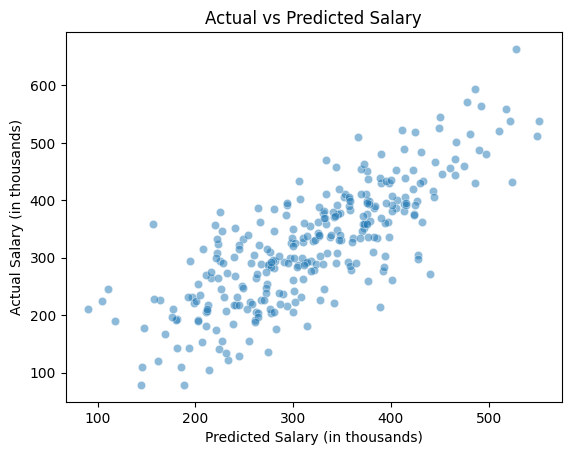

In [ ]:
# Actual vs Predicted: points close to the diagonal imply good calibration
sns.scatterplot(x=predictions, y=y_test, alpha=0.5)
plt.xlabel('Predicted Salary (in thousands)')
plt.ylabel('Actual Salary (in thousands)')
plt.title('Actual vs Predicted Salary')
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

### Error Metrics: MAE, MSE, RMSE

- MAE (Mean Absolute Error): average absolute difference between predicted and actual salaries. Robust to outliers, easy to interpret in the original units.
- MSE (Mean Squared Error): average squared difference; penalizes larger errors more strongly.
- RMSE (Root Mean Squared Error): square root of MSE; same units as the target (thousands per year). Often used to summarize typical error magnitude.

In [ ]:
# Report common regression error metrics
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Squared Error: 3921.835026117439
Mean Absolute Error: 49.19228628008093
RMSE:  62.62455609517276


### Residuals

Residuals = actual − predicted. Inspecting their distribution helps validate assumptions:
- Centered near zero (unbiased)
- Approximately normal (for inference)
- Constant spread across fitted values (homoscedasticity)

We plot a histogram with KDE and a Q–Q plot to check normality and spot skew/outliers.

In [ ]:
# Residuals: actual - predicted (in thousands)
residuals = y_test - predictions

In [92]:
residuals

521   -124.419277
737     27.348205
740      9.479341
660    -33.904417
411     48.606424
          ...    
468     37.305273
935    -33.340450
428      0.883628
7       40.058825
155    -42.987036
Name: annualSalary(in thousands), Length: 300, dtype: float64

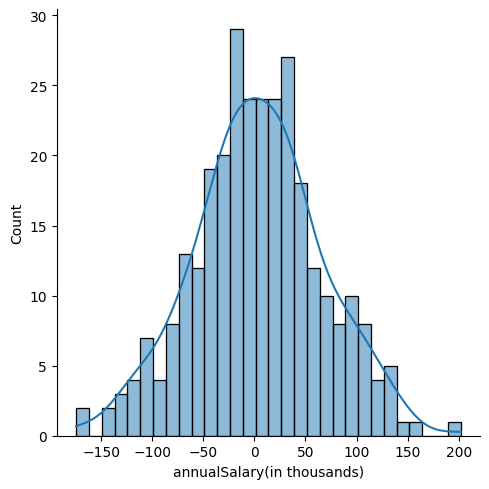

In [ ]:
# Residual distribution: look for approximate symmetry and center around zero
sns.displot(residuals, 
            bins=30, 
            kde=True)
plt.xlabel('Residual (thousands)')
plt.title('Residuals Histogram with KDE')
plt.show()

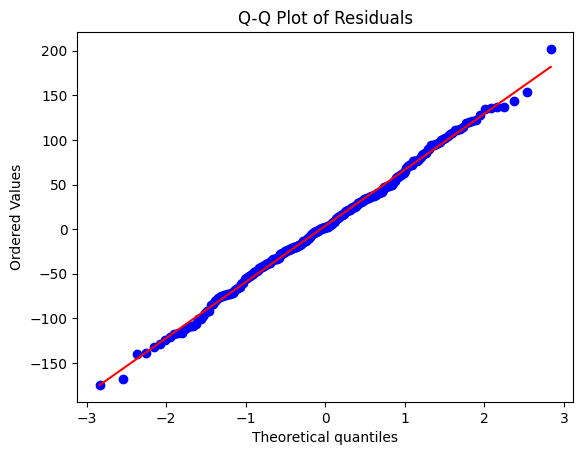

In [ ]:
import scipy.stats as stats

# Q–Q plot: residual quantiles vs theoretical normal quantiles
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

## Conclusion

Performance (held-out test set)
- R² ≈ 0.62: the model explains about 62% of the variance in annual salary; ~38% remains unexplained.
- MAE ≈ 49 (thousands) and RMSE ≈ 62.6 (thousands): typical absolute error is roughly $49K, with a root-mean-square error around $62.6K. Given a mean annual salary near ~$321K (26.7 × 12 thousands), RMSE is ~20% of the mean, which is sizable.

Why the model isn’t very fruitful (many prediction errors)
- Single-feature limitation: using only experience to predict salary ignores major drivers (role, industry, company size, geography, education/skills, performance). This missing information shows up as unexplained variance (large residuals).
- Linear form is too simple: a single straight line (constant slope) can’t capture threshold effects or diminishing returns with experience. The Actual vs Predicted plot shows a broad, diffuse cloud rather than a tight diagonal.
- Heteroscedasticity and noise: the spread of residuals appears large across the range; annualizing the monthly target multiplies noise by 12, magnifying errors. Outliers (e.g., negative monthly values and extreme residuals) further inflate MAE/RMSE.
- Modeling/measurement realities: compensation data is inherently noisy; many unobserved factors shift pay bands even for the same experience level.

Evidence from diagnostics
- Residuals histogram: centered near zero but with wide spread; tails extend to large negative/positive errors.
- Q–Q plot: roughly linear in the middle with deviations in the tails, consistent with heavier-tailed errors.
- Actual vs Predicted: substantial dispersion around the diagonal, indicating sizeable errors across the range.

Actionable next steps
- Add features: role/title, location, industry, company size, education, skill set, seniority band.
- Model nonlinearity: polynomial/spline terms for experience or non-linear models (e.g., RandomForest/GradientBoosting/XGBoost).
- Stabilize variance: predict log(salary) instead of salary; interpret back via exponentiation.
- Robustness to outliers: use robust regression (Huber/RANSAC) or winsorize extreme targets.
- Better validation: use k-fold cross-validation and include scale-free metrics (e.g., MAPE) to compare models.

Bottom line: a univariate linear model is a useful baseline but underfits this problem. Enhancing features and allowing non-linear structure should reduce the large prediction errors and improve real-world utility.